In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as mse
from sklearn.model_selection import cross_val_score
import pickle

In [8]:
df = pd.read_csv("F:\Projects\Housing Market\house_details.csv")
df

,Price,Area,Bedrooms,Bathrooms,Location,Builder,Status
0,60 L,1150,3,3 Bathrooms,Avadi,NaN,Ready to move
1,48 L,931,2,2 Bathrooms,Avadi,NaN,Ready to move
2,26 L,739,2,1 Bathrooms,Avadi,NaN,Ready to move
3,25 L,728,2,2 Bathrooms,Avadi,NaN,Ready to move
4,20 L,317,1,1 Bathrooms,Avadi,NaN,Ready to move
...,...,...,...,...,...,...,...
2906,76 L,1254,2,2 Bathrooms,Karapakkam,Bhaggyam Pragathi,Ready to move
2907,81 L,1573,2,2 Bathrooms,Karapakkam,Shree Ayshwarya Aishwarya Prapancha,Ready to move
2908,67 L,1042,2,3 Bathrooms,Karapakkam,NaN,Ready to move
2909,1.15 Cr,1485,3,NaN,Karapakkam,Urbando Eterna,Under Construction


In [9]:
df.head(5)

,Price,Area,Bedrooms,Bathrooms,Location,Builder,Status
0,60 L,1150,3,3 Bathrooms,Avadi,NaN,Ready to move
1,48 L,931,2,2 Bathrooms,Avadi,NaN,Ready to move
2,26 L,739,2,1 Bathrooms,Avadi,NaN,Ready to move
3,25 L,728,2,2 Bathrooms,Avadi,NaN,Ready to move
4,20 L,317,1,1 Bathrooms,Avadi,NaN,Ready to move


In [10]:
df.isnull().sum()

Price          0
Area           0
Bedrooms       0
Bathrooms    698
Location       0
Builder      952
Status         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911 entries, 0 to 2910
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      2911 non-null   object
 1   Area       2911 non-null   int64 
 2   Bedrooms   2911 non-null   int64 
 3   Bathrooms  2213 non-null   object
 4   Location   2911 non-null   object
 5   Builder    1959 non-null   object
 6   Status     2911 non-null   object
dtypes: int64(2), object(5)
memory usage: 159.3+ KB


#Preprocessing

In [12]:
# converting the price to float

for i in range(len(df["Price"])):
  a = df["Price"][i].split(" ")
  if a[1] == "Cr":
    
    b = float(a[0])*100
    df["Price"][i] = b
  else:
    df["Price"][i] = float(a[0])

df["Price"]


C:\Users\Mohamed Adnan\AppData\Local\Temp\ipykernel_11324\520544407.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"][i] = float(a[0])
C:\Users\Mohamed Adnan\AppData\Local\Temp\ipykernel_11324\520544407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"][i] = b


0        60.0
1        48.0
2        26.0
3        25.0
4        20.0
        ...  
2906     76.0
2907     81.0
2908     67.0
2909    115.0
2910    79.66
Name: Price, Length: 2911, dtype: object

In [13]:
df["Price"] = df["Price"].astype("float64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911 entries, 0 to 2910
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      2911 non-null   float64
 1   Area       2911 non-null   int64  
 2   Bedrooms   2911 non-null   int64  
 3   Bathrooms  2213 non-null   object 
 4   Location   2911 non-null   object 
 5   Builder    1959 non-null   object 
 6   Status     2911 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 159.3+ KB


In [15]:
#df.dropna(axis = 0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911 entries, 0 to 2910
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      2911 non-null   float64
 1   Area       2911 non-null   int64  
 2   Bedrooms   2911 non-null   int64  
 3   Bathrooms  2213 non-null   object 
 4   Location   2911 non-null   object 
 5   Builder    1959 non-null   object 
 6   Status     2911 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 159.3+ KB


In [17]:
df["Bathrooms"].fillna(0,inplace = True)

In [18]:
df["Bathrooms"] = df["Bathrooms"].apply(lambda x:x.strip("Bathrooms") if x == str(x) else x)
df["Bathrooms"] = df["Bathrooms"].astype("int64")

In [19]:
#df["Bathrooms"].replace(to_replace = 0,value = round(df.Bathrooms.mean()))

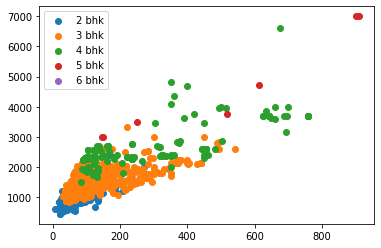

In [20]:
def scatter_plot(df):
  bath2 = df[ (df.Bedrooms == 2)]
  bath3 = df[ (df.Bedrooms == 3)]
  bath4 = df[ (df.Bedrooms == 4)]
  bath5 = df[ (df.Bedrooms == 5)]
  bath6 = df[ (df.Bedrooms == 6)]


  plt.scatter(bath2.Price,bath2.Area,label = "2 bhk")
  plt.scatter(bath3.Price,bath3.Area,label = "3 bhk")
  plt.scatter(bath4.Price,bath4.Area,label = "4 bhk")
  plt.scatter(bath5.Price,bath5.Area,label = "5 bhk")
  plt.scatter(bath6.Price,bath6.Area,label = "6 bhk")

  plt.legend()

scatter_plot(df)

In [21]:
for i in range(len(df["Bathrooms"])):
  if df["Bathrooms"].isnull()[i]:
    if df["Area"][i] < 1000 and df["Bedrooms"][i] <= 2:
      df["Bathrooms"][i] == 2
    elif (df["Area"][i] >= 1000 and df["Area"][i] <= 2000) and df["Bedrooms"][i] <= 3:
      df["Bathrooms"][i] == 3
    elif (df["Area"][i] >= 2000 and df["Area"][i] <= 2500) and df["Bedrooms"][i] <= 4:
      df["Bathrooms"][i] == 4
    else:
      df["Bathrooms"][i] == df["Bedrooms"][i]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911 entries, 0 to 2910
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      2911 non-null   float64
 1   Area       2911 non-null   int64  
 2   Bedrooms   2911 non-null   int64  
 3   Bathrooms  2911 non-null   int64  
 4   Location   2911 non-null   object 
 5   Builder    1959 non-null   object 
 6   Status     2911 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 159.3+ KB


In [23]:
df["Builder"].fillna("Independent plot",inplace = True)

In [24]:
type((df["Bathrooms"][5]))

numpy.int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911 entries, 0 to 2910
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      2911 non-null   float64
 1   Area       2911 non-null   int64  
 2   Bedrooms   2911 non-null   int64  
 3   Bathrooms  2911 non-null   int64  
 4   Location   2911 non-null   object 
 5   Builder    2911 non-null   object 
 6   Status     2911 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 159.3+ KB


In [26]:
cols = ["Location","Builder","Status"]

for i in cols:
  print("{} : {}".format(i,len(df[i].unique())))
  print("{}".format(df[i].value_counts()))
  print()

Location : 29
Perungalathur        300
Avadi                100
Sholinganallur       100
T Nagar              100
Thoraipakkam OMR     100
Singaperumal Koil    100
Madambakkam          100
Pallikaranai         100
Chromepet            100
Perumbakkam          100
Velachery            100
Padur                100
West Tambaram        100
Pallavaram           100
Siruseri             100
Perungudi            100
Ambattur             100
Urapakkam            100
Kolathur             100
Navallur             100
Madipakkam           100
Kelambakkam          100
Porur                100
Medavakkam           100
Karapakkam           100
Choolaimedu           80
Adyar                 80
Chengalpattu          41
Neelankarai           10
Name: Location, dtype: int64

Builder : 414
Independent plot                       952
Shriram Park 63                         99
TVS Emerald Atrium At Green Acres       66
Doshi Risington                         44
LML Prakriti Phase II                   44
  

In [27]:
builder_stat = df.groupby('Builder')["Builder"].agg("count").sort_values(ascending = False)
builder_stat

Builder
Independent plot                     952
Shriram Park 63                       99
TVS Emerald Atrium At Green Acres     66
LML Prakriti Phase II                 44
Doshi Risington                       44
                                    ... 
Meera Meeras Kavya                     1
Mithun Homes                           1
Nahar Ailis                            1
Navganesh Aura                         1
Yadhav Sri Pooja Nivas                 1
Name: Builder, Length: 414, dtype: int64

In [28]:
builder_less_20 = builder_stat[builder_stat < 20]
builder_less_20

Builder
Arun Excello Sindhuraa          19
Risland The Ace                 19
Puravankara Purva Windermere    18
Prestige Courtyards             18
Lokaa M One                     17
                                ..
Meera Meeras Kavya               1
Mithun Homes                     1
Nahar Ailis                      1
Navganesh Aura                   1
Yadhav Sri Pooja Nivas           1
Name: Builder, Length: 394, dtype: int64

In [29]:
df["Builder"] = df["Builder"].apply(lambda x: "other" if  x in  builder_less_20 else x)
df["Builder"]

0       Independent plot
1       Independent plot
2       Independent plot
3       Independent plot
4       Independent plot
              ...       
2906               other
2907               other
2908    Independent plot
2909      Urbando Eterna
2910               other
Name: Builder, Length: 2911, dtype: object

In [30]:
df["Builder"].unique()

array(['Independent plot', 'other', 'Mahindra Happinest',
       'TVS Emerald Atrium At Green Acres', 'Isha Santhosham',
       'Shah Paradise', 'Shriram Park 63', 'Urban Amaze',
       'Akshaya Orlando A1 To A6', 'Arun Excello Sanjani',
       'DRA Centralia', 'Alliance Galleria Residences',
       'LML Prakriti Phase II', 'Urbanrise Code Name Independence Day',
       'Casa Grand Casagrand First City', 'Mahindra Aqualily ',
       'Akshaya Tango', 'Lifestyle The Podium',
       'Reputed Builder Apartment', 'Urbando Eterna', 'Doshi Risington'],
      dtype=object)

In [31]:
le = LabelEncoder()
df["Status"] = le.fit_transform(df["Status"])
df["Status"]

0       0
1       0
2       0
3       0
4       0
       ..
2906    0
2907    0
2908    0
2909    1
2910    0
Name: Status, Length: 2911, dtype: int32

In [32]:
dummies1 = pd.get_dummies(df.Builder)
dummies1

,Akshaya Orlando A1 To A6,Akshaya Tango,Alliance Galleria Residences,Arun Excello Sanjani,Casa Grand Casagrand First City,DRA Centralia,Doshi Risington,Independent plot,Isha Santhosham,LML Prakriti Phase II,...,Mahindra Aqualily,Mahindra Happinest,Reputed Builder Apartment,Shah Paradise,Shriram Park 63,TVS Emerald Atrium At Green Acres,Urban Amaze,Urbando Eterna,Urbanrise Code Name Independence Day,other
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2908,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
df2 = pd.concat([df,dummies1.drop('other',axis = "columns")],axis = "columns")
df2

,Price,Area,Bedrooms,Bathrooms,Location,Builder,Status,Akshaya Orlando A1 To A6,Akshaya Tango,Alliance Galleria Residences,...,Lifestyle The Podium,Mahindra Aqualily,Mahindra Happinest,Reputed Builder Apartment,Shah Paradise,Shriram Park 63,TVS Emerald Atrium At Green Acres,Urban Amaze,Urbando Eterna,Urbanrise Code Name Independence Day
0,60.00,1150,3,3,Avadi,Independent plot,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48.00,931,2,2,Avadi,Independent plot,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.00,739,2,1,Avadi,Independent plot,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25.00,728,2,2,Avadi,Independent plot,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.00,317,1,1,Avadi,Independent plot,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,76.00,1254,2,2,Karapakkam,other,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,81.00,1573,2,2,Karapakkam,other,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,67.00,1042,2,3,Karapakkam,Independent plot,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,115.00,1485,3,0,Karapakkam,Urbando Eterna,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df3 = df2.drop('Builder',axis = "columns")
df3

,Price,Area,Bedrooms,Bathrooms,Location,Status,Akshaya Orlando A1 To A6,Akshaya Tango,Alliance Galleria Residences,Arun Excello Sanjani,...,Lifestyle The Podium,Mahindra Aqualily,Mahindra Happinest,Reputed Builder Apartment,Shah Paradise,Shriram Park 63,TVS Emerald Atrium At Green Acres,Urban Amaze,Urbando Eterna,Urbanrise Code Name Independence Day
0,60.00,1150,3,3,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48.00,931,2,2,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.00,739,2,1,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25.00,728,2,2,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.00,317,1,1,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,76.00,1254,2,2,Karapakkam,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,81.00,1573,2,2,Karapakkam,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,67.00,1042,2,3,Karapakkam,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,115.00,1485,3,0,Karapakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
dummies2 = pd.get_dummies(df.Location)
dummies2

,Adyar,Ambattur,Avadi,Chengalpattu,Choolaimedu,Chromepet,Karapakkam,Kelambakkam,Kolathur,Madambakkam,...,Perungudi,Porur,Sholinganallur,Singaperumal Koil,Siruseri,T Nagar,Thoraipakkam OMR,Urapakkam,Velachery,West Tambaram
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df4 = pd.concat([df3,dummies2.drop('Adyar',axis = "columns")],axis = "columns")
df4

,Price,Area,Bedrooms,Bathrooms,Location,Status,Akshaya Orlando A1 To A6,Akshaya Tango,Alliance Galleria Residences,Arun Excello Sanjani,...,Perungudi,Porur,Sholinganallur,Singaperumal Koil,Siruseri,T Nagar,Thoraipakkam OMR,Urapakkam,Velachery,West Tambaram
0,60.00,1150,3,3,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48.00,931,2,2,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.00,739,2,1,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25.00,728,2,2,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.00,317,1,1,Avadi,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,76.00,1254,2,2,Karapakkam,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,81.00,1573,2,2,Karapakkam,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,67.00,1042,2,3,Karapakkam,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,115.00,1485,3,0,Karapakkam,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df5 = df4.drop("Location",axis = 1)
df5

,Price,Area,Bedrooms,Bathrooms,Status,Akshaya Orlando A1 To A6,Akshaya Tango,Alliance Galleria Residences,Arun Excello Sanjani,Casa Grand Casagrand First City,...,Perungudi,Porur,Sholinganallur,Singaperumal Koil,Siruseri,T Nagar,Thoraipakkam OMR,Urapakkam,Velachery,West Tambaram
0,60.00,1150,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48.00,931,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.00,739,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25.00,728,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.00,317,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,76.00,1254,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,81.00,1573,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2908,67.00,1042,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,115.00,1485,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911 entries, 0 to 2910
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Price                                 2911 non-null   float64
 1   Area                                  2911 non-null   int64  
 2   Bedrooms                              2911 non-null   int64  
 3   Bathrooms                             2911 non-null   int64  
 4   Status                                2911 non-null   int32  
 5   Akshaya Orlando A1 To A6              2911 non-null   uint8  
 6   Akshaya Tango                         2911 non-null   uint8  
 7   Alliance Galleria Residences          2911 non-null   uint8  
 8   Arun Excello Sanjani                  2911 non-null   uint8  
 9   Casa Grand Casagrand First City       2911 non-null   uint8  
 10  DRA Centralia                         2911 non-null   uint8  
 11  Doshi Risington  

In [39]:
x = df5.drop('Price',axis = 1)
y = df5['Price']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

#Model building

In [41]:
def pred_result(model):
  y_pred = model.predict(x_test)
  mse_ = mse(y_pred,y_test)
  r2 = r2_score(y_pred,y_test)
  return y_pred,mse_,r2

In [42]:
def display(r2,mse_):
  print("Accuracy : {:.2f}%".format(r2*100))
  print("MSE : {:.6f}".format(mse_))

In [43]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
x_train

array([[0.2455957 , 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.47521648, 0.44444444, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       [0.1318304 , 0.22222222, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0703195 , 0.11111111, 0.22222222, ..., 0.        , 0.        ,
        1.        ],
       [0.18184533, 0.22222222, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.17661989, 0.22222222, 0.22222222, ..., 0.        , 0.        ,
        0.        ]])

In [44]:
x_train.shape

(2328, 52)

In [45]:
def cross_score(model,n):
  acc = cross_val_score(estimator = model,X = x_train,y = y_train,cv = n)
  
  print("Accuracy : {:.2f}%".format(acc.mean()*100))
  print("SD : {:.2f}%".format(acc.std()*100))

In [46]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
cross_score(lin_model,10)

Accuracy : 87.48%
SD : 2.79%


In [47]:
lin_model.coef_

array([ 799.00451393, -177.93751912,    9.63670398,    9.88218501,
          3.78432888,   41.20403347,   10.51399443,   20.04546129,
        -26.1713042 ,  -15.08164156,   20.45339192,   -1.15055247,
          8.62408599,  -14.93026713,  126.84087084,  -41.54173168,
         17.12834356,  -13.54507394,   12.43619746,    3.53045645,
         19.70055398,   12.55289433,   12.54841548,   33.20488245,
       -131.8005342 , -144.0354335 , -158.62798915,  -85.87235087,
       -131.8934302 , -140.29749612, -152.46484531, -138.05638791,
       -133.11323605, -123.82097013, -141.08277368, -141.64055757,
       -109.03908916, -157.47777183, -130.06003174, -140.23148973,
       -147.55209568, -150.83047362, -103.89173926, -129.49455227,
       -136.38781382, -150.39958292, -155.18123394,   -4.85974554,
       -128.27404256, -145.41040413,  -95.89163404, -136.16241533])

In [48]:
coeff_df = pd.DataFrame(lin_model.coef_,x.columns,columns=["Coefficient"])
coeff_df

,Coefficient
Area,799.004514
Bedrooms,-177.937519
Bathrooms,9.636704
Status,9.882185
Akshaya Orlando A1 To A6,3.784329
Akshaya Tango,41.204033
Alliance Galleria Residences,10.513994
Arun Excello Sanjani,20.045461
Casa Grand Casagrand First City,-26.171304
DRA Centralia,-15.081642


In [49]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
cross_score(tree_model,10)

Accuracy : 84.35%
SD : 7.19%


In [50]:
#y_pred,mse_,r2 = pred_result(tree_model)

In [51]:
#tree_model.score(x_test,y_test)

In [52]:
#display(r2,mse_)

In [53]:
svm_model = SVR(kernel = "rbf")
svm_model.fit(x_train,y_train)
cross_score(svm_model,10)

Accuracy : 10.55%
SD : 3.08%


In [54]:
#y_pred,mse_,r2 = pred_result(svm_model)

In [55]:
#svm_model.score(x_test,y_test)

In [56]:
#display(r2,mse_)

In [57]:
rand_forest = RandomForestRegressor(n_estimators = 11)
rand_forest.fit(x_train,y_train)
cross_score(rand_forest,10)

Accuracy : 89.64%
SD : 5.46%


In [58]:
#y_pred,mse_,r2 = pred_result(rand_forest)

In [59]:
#rand_forest.score(x_test,y_test)

In [60]:
#display(r2,mse_)

In [61]:
df5.iloc[0,:]

Price                                     60.0
Area                                    1150.0
Bedrooms                                   3.0
Bathrooms                                  3.0
Status                                     0.0
Akshaya Orlando A1 To A6                   0.0
Akshaya Tango                              0.0
Alliance Galleria Residences               0.0
Arun Excello Sanjani                       0.0
Casa Grand Casagrand First City            0.0
DRA Centralia                              0.0
Doshi Risington                            0.0
Independent plot                           1.0
Isha Santhosham                            0.0
LML Prakriti Phase II                      0.0
Lifestyle The Podium                       0.0
Mahindra Aqualily                          0.0
Mahindra Happinest                         0.0
Reputed Builder Apartment                  0.0
Shah Paradise                              0.0
Shriram Park 63                            0.0
TVS Emerald A

In [62]:
rand_forest.predict(scale.transform([[1150,8,3,	0,	0,	0	,0,	0	,0	,0	,0	,1	,0	,0	,0	,0	,0	,0	,0,0,	0,	0	,0,	0	,0	,1	,0	,0	,0	,0	,0	,0	,0	,0	,0,0,	0,	0	,0,	0	,0	,0	,0	,0	,0	,0	,0	,0	,0	,0,0,0]]))


c:\Python3101\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([47.35636364])

In [63]:
with open("model.pkl","wb") as file:
  a = pickle.dump(rand_forest,file)

In [64]:
with open("scaler.pkl" , "wb") as file:
    b = pickle.dump(scale,file)